In [1]:
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape, y_train.shape)

KeyboardInterrupt: 

In [ ]:
print("Sample labels:", y_train[:5])

Sample labels: [5 0 4 1 9]


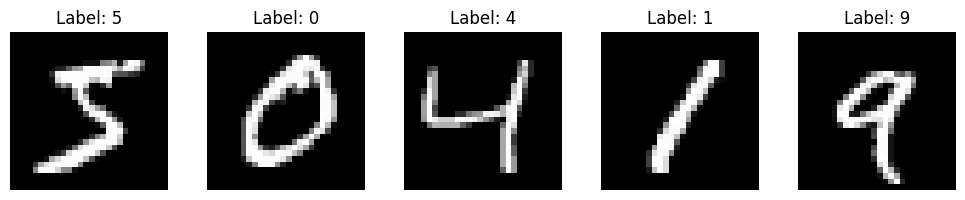

In [ ]:
import matplotlib.pyplot as plt

# Set up the figure
plt.figure(figsize=(10, 2))

for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train[i],cmap="gray") # Gray for black and white
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [ ]:
# Reshape the input data to add a channel dimension
# Original shape: (number of images, 28, 28)
# New shape: (number of images, 28, 28, 1)
# The '1' at the end represents the number of color channels (1 for grayscale)
# This format is required by Conv2D layers in CNNs, which expect input in the form (height, width, channels)
# Channel is like no of layers
# NOTE: This does NOT change the pixel values — it only changes how the data is organized
# For example:
# [[100, 150],
#  [200, 250]] → shape (2, 2)
# becomes
# [[[100], [150]],
#  [[200], [250]]] → shape (2, 2, 1)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


In [ ]:
# Normalize pixel values from [0, 255] to [0.0, 1.0] for faster and more stable training
# 255 -> White 0 -> Black in the image
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


In [ ]:
print(x_train[0])

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

In [ ]:
# 🎯 One-Hot Encoding: Convert integer class labels (e.g., 0–9) into binary vectors
# ------------------------------------------------------------
# Neural networks can't directly understand class labels like [3, 7, 2]
# because they may mistakenly treat them as numbers with order (e.g., 7 > 3).
#
# One-hot encoding solves this by converting each class label into a vector
# with all 0s except a 1 at the index corresponding to the class.

# For example:
# Label:        3           →    One-hot: [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
# Label:        7           →    One-hot: [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]

# This ensures that all classes are treated as distinct categories, not ordered numbers.

# 🧠 Real-life Analogy:
# Think of it like a checkbox question on a form asking for your favorite fruit:
# [Apple] [Banana] [Mango✓] [Grapes] ... [Pineapple]
# Only one is selected (1), the rest are unselected (0)

# ✅ We use keras.utils.to_categorical to perform this transformation.
# This is required for models with softmax output and categorical_crossentropy loss.

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


In [ ]:
# You are given 28x28 grayscale images of digits.
# Each image is just a grid of pixel values from 0 (black) to 255 (white).
# You want your model to learn how a “2” looks different from a “7” — just like your brain does!

# 👉 Let’s build the model one layer at a time

model = Sequential()  # “Hey Keras, I want to build a model where each layer comes one after another.”

# 🔍 Layer 1: First Convolution
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
# “Start with scanning the image using 32 filters of size 5×5.
# Each filter is like a tiny window that slides across the image and detects basic patterns like edges or corners.
# activation='relu' means: If a filter sees something important, keep it (positive values); else ignore it (zero).
# input_shape=(28, 28, 1) means: Each image is 28×28 pixels with 1 color channel (black & white).”

# 🔻 Layer 2: Max Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
# “Okay, now that you found some features... reduce the image size.
# From each 2×2 square, just keep the biggest value — this is called max pooling.
# It makes the image smaller and keeps only the important stuff.”

# 🔍 Layer 3: Second Convolution
model.add(Conv2D(64, (3, 3), activation='relu'))
# “Let’s scan the reduced image again with 64 filters of size 3×3.
# Now the model will learn more complex patterns like curves, parts of digits, etc.”

# 🔻 Layer 4: More Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
# “Again, shrink the image by keeping only the strongest signals in each 2×2 patch.”

# 🔄 Layer 5: Flattening
model.add(Flatten())
# “I’m done with all the scanning. Now flatten the 2D data (like a 3D cube) into a 1D list of numbers.
# Why? Because now I want to make decisions, and decision-making layers expect a flat list.”

# 🧠 Layer 6: Fully Connected Dense Layer
model.add(Dense(128, activation='relu'))
# “Now use a layer with 128 brain-like neurons.
# Each one will combine features from earlier to form ideas like:
# 👉 ‘Maybe this is a loop of a 6’
# 👉 ‘This corner and that edge look like a 7’”

# 🔥 Layer 7: Dropout (Prevent Overfitting)
model.add(Dropout(0.3))
# “Let’s avoid overthinking!
# Randomly turn off 30% of these neurons during training so the model doesn’t get too confident about one pattern.”

# 🧠 Layer 8: Another Dense Layer
model.add(Dense(64, activation='relu'))
# “Add another layer with 64 neurons.
# Let them build more abstract features by combining ideas from the last layer.”

# 🔥 Layer 9: Stronger Dropout
model.add(Dropout(0.5))
# “Again, turn off half the neurons while training — this prevents overfitting (memorizing instead of learning).”

# 🎯 Output Layer
model.add(Dense(10, activation='softmax'))
# “Finally, add 10 neurons — one for each digit (0 to 9).
# Use softmax, which turns their outputs into probabilities.
# If softmax says:
# [0.01, 0.00, 0.96, 0.00, 0.00, 0.01, 0.00, 0.01, 0.00, 0.00]
# Then it’s 96% confident this is the digit 2.”


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# ✅ Step: Compile the Model — tell Keras how to train

model.compile(
    loss=keras.losses.categorical_crossentropy,  # 🔺 “How wrong was the model?”
    # Since our labels are one-hot encoded, we use categorical crossentropy.
    # It compares the predicted probabilities with the actual one-hot vector like:
    # Predicted: [0.1, 0.2, 0.7] vs Actual: [0, 0, 1]
    # Lower the loss, the better the model is learning.

    optimizer=keras.optimizers.Adadelta(),  # 🧠 “How should the model learn?”
    # Adadelta is an optimizer — it adjusts weights automatically based on how wrong the model was.
    # It’s adaptive, which means it updates faster when the model is confused and slows down when it's getting confident.

    metrics=['accuracy']  # 📈 “What should we monitor while training?”
    # We’ll keep track of accuracy — how many predictions were actually correct.
)


In [ ]:
batch_size = 128
epochs = 10
hist = model.fit(
    x_train, y_train,
    batch_size=128,
    epochs=10,
    verbose=1,
    validation_data=(x_test, y_test)
)

# ✅ This is where your model starts *learning* from the training data!
# `fit` means: “Start training on x_train images to learn how to predict y_train labels”
# It returns a `History` object (saved in `hist`) which records loss & accuracy over time

# batch_size=batch_size
# 🔁 “How many samples to show the model at once?”
# If batch_size = 128, the model sees 128 images → adjusts weights → repeats
# Smaller = slower but more accurate. Bigger = faster but may miss details.
# 60000/128 = 469 per epoch

# epochs=epochs
# 🔄 “How many times to show the *entire training set*?”
# If epochs = 10, it means the model sees all 60,000 images 10 times
# More epochs = more learning, but also more time (and risk of overfitting)

# verbose=1
# 📢 “How much output do you want while training?”
# 0 = silent, 1 = progress bar, 2 = one line per epoch
# 1 is perfect for most use cases — shows a live progress bar

# validation_data=(x_test, y_test)
# 🧪 After each epoch, test how well the model performs on *unseen* test data
# This helps you monitor overfitting (training accuracy high, test accuracy low = overfitting)

print("The model has successfully trained")


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 53s 108ms/step - accuracy: 0.1170 - loss: 2.3004 - val_accuracy: 0.2352 - val_loss: 2.2880
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 79s 102ms/step - accuracy: 0.1428 - loss: 2.2898 - val_accuracy: 0.3172 - val_loss: 2.2757
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 49s 105ms/step - accuracy: 0.1685 - loss: 2.2787 - val_accuracy: 0.3800 - val_loss: 2.2627
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 84s 110ms/step - accuracy: 0.1963 - loss: 2.2668 - val_accuracy: 0.4154 - val_loss: 2.2489
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 106ms/step - accuracy: 0.2135 - loss: 2.2561 - val_accuracy: 0.4343 - val_loss: 2.2342
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 49s 105ms/step - accuracy: 0.2291 - loss: 2.2440 - val_accuracy: 0.4498 - val_loss: 2.2186
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 101ms/step - accuracy: 0.2476 - loss: 2.2297 - val_accuracy: 0.4627 - val_loss: 2.2015
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 84s 105ms/step - accuracy: 0.2659 - loss: 2

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

model.save('mnist.h5')
print("Saving the model as mnist.h5")

Test loss: 2.1373229026794434
Test accuracy: 0.489300012588501
Saving the model as mnist.h5
